In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py 
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import tree
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Importing data

In [2]:
leg_data = pd.read_csv('Data/games.csv')
leg_data.head(5)

gameId   creationTime  gameDuration  seasonId  winner  firstBlood  \
0  3326086514  1504279457970          1949         9       1           2   
1  3229566029  1497848803862          1851         9       1           1   
2  3327363504  1504360103310          1493         9       1           2   
3  3326856598  1504348503996          1758         9       1           1   
4  3330080762  1504554410899          2094         9       1           2   

   firstTower  firstInhibitor  firstBaron  firstDragon  ...  t2_towerKills  \
0           1               1           1            1  ...              5   
1           1               1           0            1  ...              2   
2           1               1           1            2  ...              2   
3           1               1           1            1  ...              0   
4           1               1           1            1  ...              3   

   t2_inhibitorKills  t2_baronKills  t2_dragonKills  t2_riftHeraldKills  \
0                  0              0               1                   1   
1                  0              0               0                   0   
2                  0              0               1                   0   
3                  0              0               0                   0   
4                  0              0               1                   0   

   t2_ban1  t2_ban2  t2_ban3  t2_ban4  t2_ban5  
0      114       67       43       16       51  
1       11       67      238       51      420  
2      157      238      121       57       28  
3      164       18      141       40       51  
4       86       11      201      122       18  

[5 rows x 61 columns]

### Data processing 
#### remove seasonld, hero banlist

In [3]:
leg_data.drop(['t2_ban1','t2_ban2','t2_ban3','t2_ban4','t2_ban5'],inplace=True, axis=1)

In [4]:
leg_data.head(5)

gameId   creationTime  gameDuration  seasonId  winner  firstBlood  \
0  3326086514  1504279457970          1949         9       1           2   
1  3229566029  1497848803862          1851         9       1           1   
2  3327363504  1504360103310          1493         9       1           2   
3  3326856598  1504348503996          1758         9       1           1   
4  3330080762  1504554410899          2094         9       1           2   

   firstTower  firstInhibitor  firstBaron  firstDragon  ...  t2_champ4_sum1  \
0           1               1           1            1  ...              14   
1           1               1           0            1  ...               4   
2           1               1           1            2  ...               4   
3           1               1           1            1  ...               4   
4           1               1           1            1  ...               4   

   t2_champ4_sum2  t2_champ5id  t2_champ5_sum1  t2_champ5_sum2  t2_towerKills  \
0               4          412               4               3              5   
1              14           92               4               7              2   
2              11           22               7               4              2   
3              14           22               4               7              0   
4              12           51               4               7              3   

   t2_inhibitorKills  t2_baronKills  t2_dragonKills  t2_riftHeraldKills  
0                  0              0               1                   1  
1                  0              0               0                   0  
2                  0              0               1                   0  
3                  0              0               0                   0  
4                  0              0               1                   0  

[5 rows x 56 columns]

### Data analyzing
#### Single impact of different resources on winning rate
##### 1. Team side choice
##### 2. game duration
##### 3. First kill
##### 4. inhibitorKills
##### 5. firstBaron
##### 6. dragonKills
##### 7. towerkills


In [5]:
Winning_team = go.Pie(labels=leg_data['winner'].value_counts().values, 
                values=leg_data['winner'].value_counts().values,
                )
               
layout = go.Layout(title='winning condition')

l_data = [Winning_team]
fig = go.Figure(l_data).show()
fig


In [6]:
leg_data['game_duration'] = round(leg_data['gameDuration'] / 60) 

x1 = leg_data[leg_data['winner'] == 1]['game_duration']
x2 = leg_data[leg_data['winner'] == 2]['game_duration'] 

team1_time = go.Histogram(x=x1, bingroup=25, name='team1', opacity=0.9)
team2_time = go.Histogram(x=x2, bingroup=25, name='team2', opacity=0.9)  
bg = go.Layout(title='game_duration') 

data = [team1_time, team2_time] 
fig = go.Figure(data, bg).show()
fig



In [7]:
def plot_bar_vertical(input_col: str, target_col: str, title_name: str):
    cross_table = round(pd.crosstab(leg_data[input_col], leg_data[target_col], normalize='index')*100, 2)
    index_0 = cross_table.columns.tolist()[0] 
    index_1 = cross_table.columns.tolist()[1] 
    t1 = go.Bar(x=cross_table.index.tolist(),y=cross_table[index_0].values.tolist(),name=index_0,orientation='v', marker=dict(color='rgb(250,520,250)')
                   ) 
    t2 = go.Bar(x=cross_table.index.tolist(), y=cross_table[index_1].values.tolist(), name=index_1,orientation='v',marker=dict(color='rgb(100,300,200)')) 

    data = [t1, t2] 
    layout = go.Layout(title=title_name, bargap=0.4, barmode='stack')

    fig = go.Figure(data=data, layout=layout)
    return fig

In [8]:
plot_bar_vertical('firstBlood', 'winner', 'First blood winning rate').show()  

In [9]:
plot_bar_vertical(input_col='t2_inhibitorKills', target_col='winner', title_name='inhibitor related to winning') 

In [10]:
plot_bar_vertical(input_col='firstBaron', target_col='winner', title_name='First baron r')

In [11]:
plot_bar_vertical(input_col='t1_dragonKills', target_col='winner', 
                    title_name='T1 dragon related to winning')

In [12]:
plot_bar_vertical(input_col='t1_towerKills', target_col='winner', title_name='Tower kill realted to winning')  

#### ML training
##### Predict the outcome with multiple important attributes of Machine learning Training
##### 1. remove game with too short game duration
##### 2. Select feature, and importing Decsion Tree.

In [13]:
leg_data = leg_data[(leg_data['gameDuration'] >= 900)]

In [14]:
leg_data_model = leg_data[['winner', 'firstBaron', 't1_towerKills', 't1_inhibitorKills','t1_baronKills','t1_dragonKills', 't2_towerKills', 't2_inhibitorKills', 't2_baronKills', 't2_dragonKills'
              ]] 

In [15]:
x = leg_data_model.drop('winner', axis=1)
y = leg_data_model['winner']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [16]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)
print("score:", clf.score(X_test,y_test)) 

score: 0.9666234930756202


In [17]:
importance_weight = pd.DataFrame(list(zip(X_train.columns, clf.feature_importances_))) 
importance_weight.columns = ['columns', 'importances in model']
importance_weight = importance_weight.sort_values('importances in model', ascending=False)
importance_weight

columns  importances in model
5      t2_towerKills              0.687272
1      t1_towerKills              0.219558
2  t1_inhibitorKills              0.026110
6  t2_inhibitorKills              0.021998
8     t2_dragonKills              0.012767
4     t1_dragonKills              0.012384
3      t1_baronKills              0.008227
7      t2_baronKills              0.007846
0         firstBaron              0.003837

In [18]:
importance_weight.plot.bar()

# How does game result effected by first 10 mins performance

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [20]:
data = pd.read_csv("Data/high_diamond_ranked_10min.csv")
data = data.drop('gameId',axis=1)
data

blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0            0               28                   2               1   
1            0               12                   1               0   
2            0               15                   0               0   
3            0               43                   1               0   
4            0               75                   4               0   
...        ...              ...                 ...             ...   
9874         1               17                   2               1   
9875         1               54                   0               0   
9876         0               23                   1               0   
9877         0               14                   4               1   
9878         1               18                   0               1   

      blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  \
0             9           6           11                  0            0   
1             5           5            5                  0            0   
2             7          11            4                  1            1   
3             4           5            5                  1            0   
4             6           6            6                  0            0   
...         ...         ...          ...                ...          ...   
9874          7           4            5                  1            1   
9875          6           4            8                  1            1   
9876          6           7            5                  0            0   
9877          2           3            3                  1            1   
9878          6           6            5                  0            0   

      blueHeralds  ...  redTowersDestroyed  redTotalGold  redAvgLevel  \
0               0  ...                   0         16567          6.8   
1               0  ...                   1         17620          6.8   
2               0  ...                   0         17285          6.8   
3               1  ...                   0         16478          7.0   
4               0  ...                   0         17404          7.0   
...           ...  ...                 ...           ...          ...   
9874            0  ...                   0         15246          6.8   
9875            0  ...                   0         15456          7.0   
9876            0  ...                   0         18319          7.4   
9877            0  ...                   0         15298          7.2   
9878            0  ...                   0         15339          6.8   

      redTotalExperience  redTotalMinionsKilled  redTotalJungleMinionsKilled  \
0                  17047                    197                           55   
1                  17438                    240                           52   
2                  17254                    203                           28   
3                  17961                    235                           47   
4                  18313                    225                           67   
...                  ...                    ...                          ...   
9874               16498                    229                           34   
9875               18367                    206                           56   
9876               19909                    261                           60   
9877               18314                    247                           40   
9878               17379                    201                           46   

      redGoldDiff  redExperienceDiff  redCSPerMin  redGoldPerMin  
0            -643                  8         19.7         1656.7  
1            2908               1173         24.0         1762.0  
2            1172               1033         20.3         1728.5  
3            1321                  7         23.5         1647.8  
4            1004               -230         22.5         1740.4  


In [21]:
data.shape

(9879, 39)

In [22]:
data.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

# Simple features

Looking for how does the first blood effects blue win

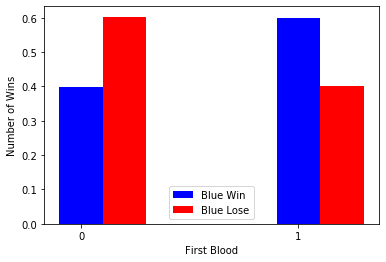

In [23]:
tempData = data[['blueWins','blueFirstBlood','redFirstBlood']]
tempData['redWins'] = 1-tempData.blueWins

inBlueFirst = tempData.set_index(['blueFirstBlood'])
blueFirstWin = inBlueFirst['blueWins'].groupby(['blueFirstBlood']).sum().reset_index()
#blueFirstWin['blueWinPerc'] = blueFirstWin['blueWins']/blueFirstWin['blueWins'].sum()

inRedFirst = tempData.set_index(['blueFirstBlood'])
redFirstWin = inRedFirst['redWins'].groupby(['blueFirstBlood']).sum().reset_index()
#redFirstWin['redWinPerc'] = redFirstWin['redWins']/redFirstWin['redWins'].sum()

bluePrec0 = blueFirstWin['blueWins'][0]/(blueFirstWin['blueWins'][0] + redFirstWin['redWins'][0])
bluePrec1 = blueFirstWin['blueWins'][1]/(blueFirstWin['blueWins'][1] + redFirstWin['redWins'][1])
blueFirstWin['blueWinPerc'] = [bluePrec0, bluePrec1]

redPrec0 = redFirstWin['redWins'][0]/(blueFirstWin['blueWins'][0] + redFirstWin['redWins'][0])
redPrec1 = redFirstWin['redWins'][1]/(blueFirstWin['blueWins'][1] + redFirstWin['redWins'][1])
redFirstWin['redWinPerc'] = [redPrec0,redPrec1]

plt.figure()
plt.bar(blueFirstWin.blueFirstBlood, blueFirstWin.blueWinPerc,color='b',width = 0.2,label='Blue Win')
plt.bar(redFirstWin.blueFirstBlood+0.2, redFirstWin.redWinPerc,color='r',width = 0.2,label='Blue Lose')
plt.xlabel('First Blood')
plt.xticks([0,1])
plt.ylabel('Number of Wins')
plt.legend()
plt.show()


How does blue wins effected by whether they get bouns from boss or not

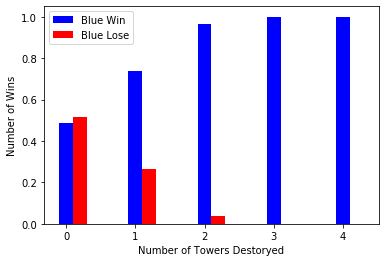

In [24]:
tempData = data[['blueWins','blueTowersDestroyed','redTowersDestroyed']]
tempData['redWins'] = 1-tempData.blueWins

inBlueFirst = tempData.set_index(['blueTowersDestroyed'])
blueFirstWin = inBlueFirst['blueWins'].groupby(['blueTowersDestroyed']).sum().reset_index()
blueFirstWin['blueWinPerc'] = blueFirstWin['blueWins']/blueFirstWin['blueWins'].sum()

inRedFirst = tempData.set_index(['blueTowersDestroyed'])
redFirstWin = inRedFirst['redWins'].groupby(['blueTowersDestroyed']).sum().reset_index()
redFirstWin['redWinPerc'] = redFirstWin['redWins']/redFirstWin['redWins'].sum()

bluePrec0 = blueFirstWin['blueWins'][0]/(blueFirstWin['blueWins'][0] + redFirstWin['redWins'][0])
bluePrec1 = blueFirstWin['blueWins'][1]/(blueFirstWin['blueWins'][1] + redFirstWin['redWins'][1])
bluePrec2 = blueFirstWin['blueWins'][2]/(blueFirstWin['blueWins'][2] + redFirstWin['redWins'][2])
bluePrec3 = blueFirstWin['blueWins'][3]/(blueFirstWin['blueWins'][3] + redFirstWin['redWins'][3])
bluePrec4 = blueFirstWin['blueWins'][4]/(blueFirstWin['blueWins'][4] + redFirstWin['redWins'][4])
blueFirstWin['blueWinPerc'] = [bluePrec0, bluePrec1,bluePrec2,bluePrec3,bluePrec4]

redPrec0 = redFirstWin['redWins'][0]/(blueFirstWin['blueWins'][0] + redFirstWin['redWins'][0])
redPrec1 = redFirstWin['redWins'][1]/(blueFirstWin['blueWins'][1] + redFirstWin['redWins'][1])
redPrec2 = redFirstWin['redWins'][2]/(blueFirstWin['blueWins'][2] + redFirstWin['redWins'][2])
redPrec3 = redFirstWin['redWins'][3]/(blueFirstWin['blueWins'][3] + redFirstWin['redWins'][3])
redPrec4 = redFirstWin['redWins'][4]/(blueFirstWin['blueWins'][4] + redFirstWin['redWins'][4])
redFirstWin['redWinPerc'] = [redPrec0,redPrec1,redPrec2,redPrec3,redPrec4]

plt.figure()
plt.bar(blueFirstWin.blueTowersDestroyed, blueFirstWin.blueWinPerc,color='b',width = 0.2,label='Blue Win')
plt.bar(redFirstWin.blueTowersDestroyed+0.2, redFirstWin.redWinPerc,color='r',width = 0.2,label='Blue Lose')
plt.xlabel('Number of Towers Destoryed')
plt.xticks([0,1,2,3,4])
plt.ylabel('Number of Wins')
plt.legend()
plt.show()

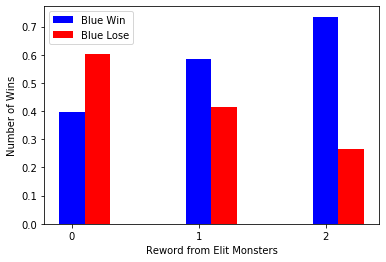

In [25]:
tempData = data[['blueWins','blueEliteMonsters','redEliteMonsters']]
tempData['redWins'] = 1-tempData.blueWins

inBlueFirst = tempData.set_index(['blueEliteMonsters'])
blueFirstWin = inBlueFirst['blueWins'].groupby(['blueEliteMonsters']).sum().reset_index()
#blueFirstWin['blueWinPerc'] = blueFirstWin['blueWins']/blueFirstWin['blueWins'].sum()

inRedFirst = tempData.set_index(['blueEliteMonsters'])
redFirstWin = inRedFirst['redWins'].groupby(['blueEliteMonsters']).sum().reset_index()
#redFirstWin['redWinPerc'] = redFirstWin['redWins']/redFirstWin['redWins'].sum()

bluePrec0 = blueFirstWin['blueWins'][0]/(blueFirstWin['blueWins'][0] + redFirstWin['redWins'][0])
bluePrec1 = blueFirstWin['blueWins'][1]/(blueFirstWin['blueWins'][1] + redFirstWin['redWins'][1])
bluePrec2 = blueFirstWin['blueWins'][2]/(blueFirstWin['blueWins'][2] + redFirstWin['redWins'][2])
blueFirstWin['blueWinPerc'] = [bluePrec0, bluePrec1,bluePrec2]

redPrec0 = redFirstWin['redWins'][0]/(blueFirstWin['blueWins'][0] + redFirstWin['redWins'][0])
redPrec1 = redFirstWin['redWins'][1]/(blueFirstWin['blueWins'][1] + redFirstWin['redWins'][1])
redPrec2 = redFirstWin['redWins'][2]/(blueFirstWin['blueWins'][2] + redFirstWin['redWins'][2])
redFirstWin['redWinPerc'] = [redPrec0,redPrec1,redPrec2]

plt.figure()
plt.bar(blueFirstWin.blueEliteMonsters, blueFirstWin.blueWinPerc,color='b',width = 0.2,label='Blue Win')
plt.bar(redFirstWin.blueEliteMonsters+0.2, redFirstWin.redWinPerc,color='r',width = 0.2,label='Blue Lose')
plt.xlabel('Reword from Elit Monsters')
plt.xticks([0,1,2])
plt.ylabel('Number of Wins')
plt.legend()
plt.show()

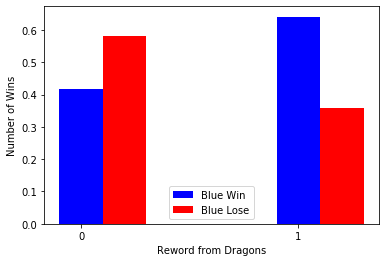

In [26]:
tempData = data[['blueWins','blueDragons','redDragons']]
tempData['redWins'] = 1-tempData.blueWins

inBlueFirst = tempData.set_index(['blueDragons'])
blueFirstWin = inBlueFirst['blueWins'].groupby(['blueDragons']).sum().reset_index()
#blueFirstWin['blueWinPerc'] = blueFirstWin['blueWins']/blueFirstWin['blueWins'].sum()

inRedFirst = tempData.set_index(['blueDragons'])
redFirstWin = inRedFirst['redWins'].groupby(['blueDragons']).sum().reset_index()
#redFirstWin['redWinPerc'] = redFirstWin['redWins']/redFirstWin['redWins'].sum()

bluePrec0 = blueFirstWin['blueWins'][0]/(blueFirstWin['blueWins'][0] + redFirstWin['redWins'][0])
bluePrec1 = blueFirstWin['blueWins'][1]/(blueFirstWin['blueWins'][1] + redFirstWin['redWins'][1])
blueFirstWin['blueWinPerc'] = [bluePrec0, bluePrec1]

redPrec0 = redFirstWin['redWins'][0]/(blueFirstWin['blueWins'][0] + redFirstWin['redWins'][0])
redPrec1 = redFirstWin['redWins'][1]/(blueFirstWin['blueWins'][1] + redFirstWin['redWins'][1])
redFirstWin['redWinPerc'] = [redPrec0,redPrec1]

plt.figure()
plt.bar(blueFirstWin.blueDragons, blueFirstWin.blueWinPerc,color='b',width = 0.2,label='Blue Win')
plt.bar(redFirstWin.blueDragons+0.2, redFirstWin.redWinPerc,color='r',width = 0.2,label='Blue Lose')
plt.xlabel('Reword from Dragons')
plt.xticks([0,1])
plt.ylabel('Number of Wins')
plt.legend()
plt.show()

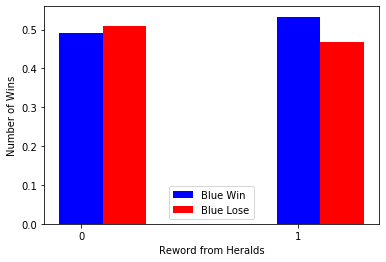

In [27]:
tempData = data[['blueWins','blueHeralds','redHeralds']]
tempData['redWins'] = 1-tempData.blueWins

inBlueFirst = tempData.set_index(['blueHeralds'])
blueFirstWin = inBlueFirst['blueWins'].groupby(['blueHeralds']).sum().reset_index()
#blueFirstWin['blueWinPerc'] = blueFirstWin['blueWins']/blueFirstWin['blueWins'].sum()

inRedFirst = tempData.set_index(['redHeralds'])
redFirstWin = inRedFirst['redWins'].groupby(['redHeralds']).sum().reset_index()
#redFirstWin['redWinPerc'] = redFirstWin['redWins']/redFirstWin['redWins'].sum()

bluePrec0 = blueFirstWin['blueWins'][0]/(blueFirstWin['blueWins'][0] + redFirstWin['redWins'][0])
bluePrec1 = blueFirstWin['blueWins'][1]/(blueFirstWin['blueWins'][1] + redFirstWin['redWins'][1])
blueFirstWin['blueWinPerc'] = [bluePrec0, bluePrec1]

redPrec0 = redFirstWin['redWins'][0]/(blueFirstWin['blueWins'][0] + redFirstWin['redWins'][0])
redPrec1 = redFirstWin['redWins'][1]/(blueFirstWin['blueWins'][1] + redFirstWin['redWins'][1])
redFirstWin['redWinPerc'] = [redPrec0,redPrec1]

plt.figure()
plt.bar(blueFirstWin.blueHeralds, blueFirstWin.blueWinPerc,color='b',width = 0.2,label='Blue Win')
plt.bar(redFirstWin.redHeralds+0.2, redFirstWin.redWinPerc,color='r',width = 0.2,label='Blue Lose')
plt.xlabel('Reword from Heralds')
plt.xticks([0,1])
plt.ylabel('Number of Wins')
plt.legend()
plt.show()

# Looking for other effective features

Calculate the ratio of blue:red for each features, and plot the average ratio for blue wins and blue lose. If the value of the feature in blue is higher than the value of the feature in red, then the ratio is greater than 1, otherwise 0. We can see in this graph, the ratio gap between blue win and blue lose is very large in feature Kills, Death and Assistants, so we think these three features may have high effective of blue wins.

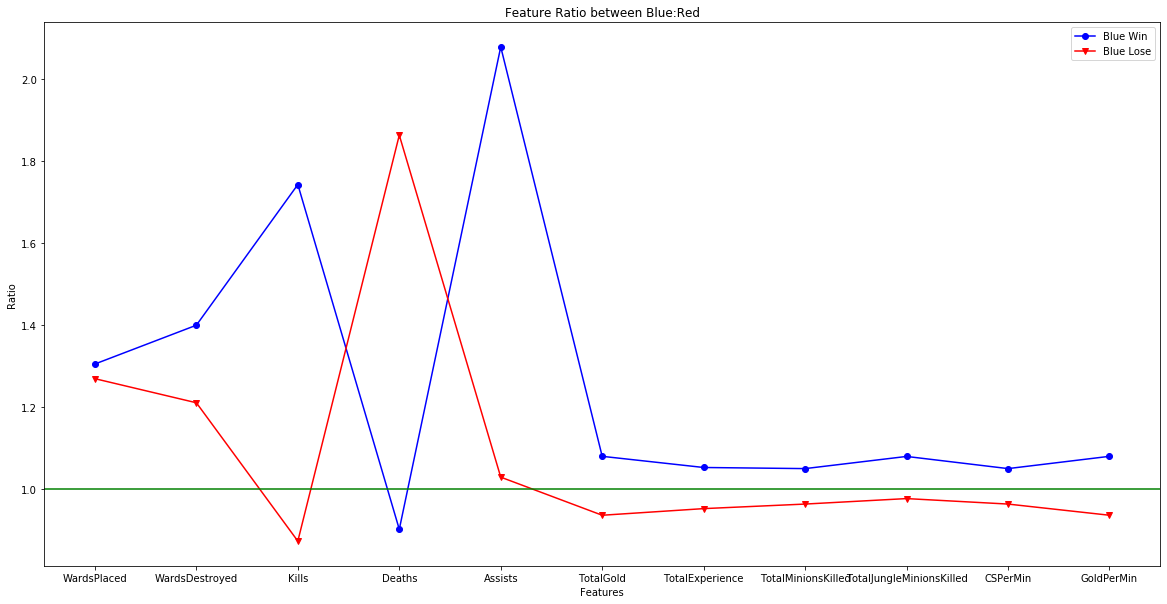

In [28]:
diff_blue_red = pd.DataFrame(data['blueWins'])
diff_blue_red['WardsPlaced'] = data['blueWardsPlaced'] / data['redWardsPlaced']
diff_blue_red['WardsDestroyed'] = data['blueWardsDestroyed'] / data['redWardsDestroyed']
diff_blue_red['Kills'] = data['blueKills'] / data['redKills']
diff_blue_red['Deaths'] = data['blueDeaths'] / data['redDeaths']
diff_blue_red['Assists'] = data['blueAssists'] / data['redAssists']
diff_blue_red['TotalGold'] = data['blueTotalGold'] / data['redTotalGold']
diff_blue_red['TotalExperience'] = data['blueTotalExperience'] / data['redTotalExperience']
diff_blue_red['TotalMinionsKilled'] = data['blueTotalMinionsKilled'] / data['redTotalMinionsKilled']
diff_blue_red['TotalJungleMinionsKilled'] = data['blueTotalJungleMinionsKilled'] / data['redTotalJungleMinionsKilled']
diff_blue_red['CSPerMin'] = data['blueCSPerMin'] / data['redCSPerMin']
diff_blue_red['GoldPerMin'] = data['blueGoldPerMin'] / data['redGoldPerMin']
diff_blue_red = diff_blue_red.replace([np.inf, -np.inf], np.nan)
diff_blue_red = diff_blue_red.dropna()
diff_blue_red

blueWin = diff_blue_red.loc[diff_blue_red['blueWins'] == 1]
blueWin = blueWin.drop('blueWins',axis=1)
blueLose = diff_blue_red.loc[diff_blue_red['blueWins'] == 0]
blueLose = blueLose.drop('blueWins',axis=1)

blueWinAve = blueWin.mean(axis=0)
blueLoseAve = blueLose.mean(axis=0)

plt.figure(figsize = (20,10))
plt.plot(blueWinAve,'bo-',label='Blue Win')
plt.plot(blueLoseAve,'rv-',label='Blue Lose')
plt.axhline(y=1, color='g', linestyle='-')
plt.xlabel('Features')
plt.ylabel('Ratio')
plt.title('Feature Ratio between Blue:Red')
plt.legend()
plt.show()

## Correlations between features and blue wins

This graph shows the correlations between all the features and blue wins, we can see that the most correlated features are gold differece and experience difference between two team. Then the next is number of total gold and total experience, and then Kills, Death, and Assistance. So we think the total gold difference and the experience difference also have high effective for blue win. And then we will mainly focus on the five features: Kills, Death, Assitance, and difference in gold and experence. 

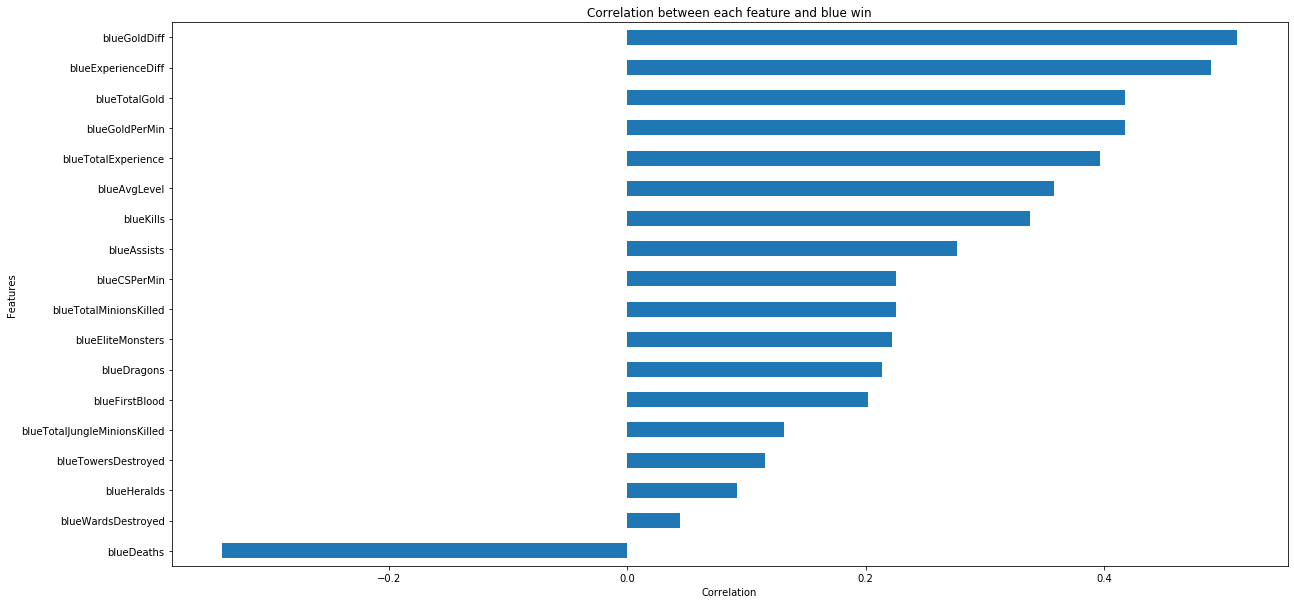

In [29]:
blueWin_cor = data[data.columns[2:20]].apply(lambda x: x.corr(data['blueWins']))
blueWin_cor = blueWin_cor.sort_values()

plt.figure(figsize=(20,10))
blueWin_cor.plot.barh()
plt.title('Correlation between each feature and blue win')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

# Kills, Death, Assist

The following figures plot the number of kills by both teams. The figure shows that when blue team have more than 15 kills in first 10 mins, they have 100% to win the game. Also the winning probablity will increase while the team have more number of kills

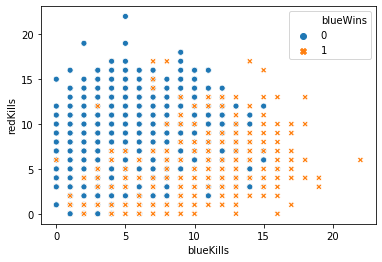

In [30]:
sns.scatterplot(data=data,x='blueKills',y='redKills',hue='blueWins',style='blueWins')

This figures shows all Deaths in both team, it is opposite with the figure of kills, so when a team has less death in first 10 mins, then they will have higher probability to win the game. 

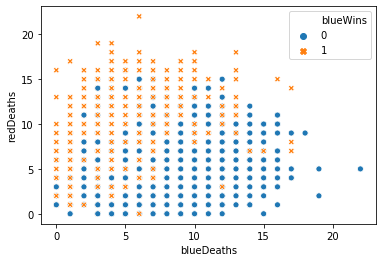

In [31]:
sns.scatterplot(data=data,x='blueDeaths',y='redDeaths',hue='blueWins',style='blueWins')

This figure shows all the Assistance from each team, it did not have very obvious result than other two, but it still briefly showed that when a team have more assistance, it will have high probability to win the game. 

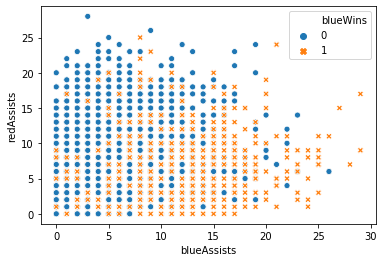

In [32]:
sns.scatterplot(data=data,x='blueAssists',y='redAssists',hue='blueWins',style='blueWins')

## KDA rate

Now let's look at the KDA rate, KDA rate = (#Kills + #Assistance) / #Death. The first figure shows all the KDA for both team, the second figure shows the relationship between KDA rate of blue team and the game results, and we can see that when the KDA rate for blue team is higher than 15, then blue team will have more than 90% to win, and if the KDA rate is more than 20, then the blue team will have 100% probability to win the game. Also in figure 1, we can learn that if a team have high KDA rate, then another team will have low KDA rate. 

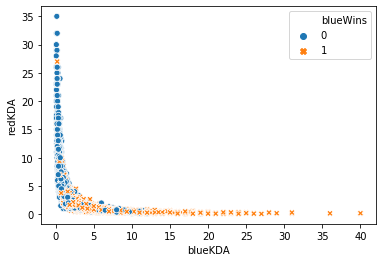

In [33]:
KDA = pd.DataFrame(data['blueWins'])
KDA['blueKDA'] = (data['blueKills'] + data['blueAssists']) / data['blueDeaths']
KDA['redKDA'] = (data['redKills'] + data['redAssists']) / data['redDeaths']


sns.scatterplot(data=KDA,x='blueKDA',y='redKDA',hue='blueWins',style='blueWins')

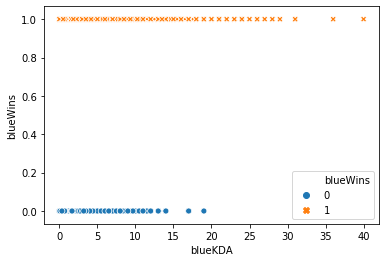

In [34]:
inBlueKDA = KDA[['blueKDA','blueWins']]
inBlueKDA['blueKDADiff'] = KDA['blueKDA'] - KDA['redKDA']
sns.scatterplot(data=inBlueKDA,x='blueKDA',y='blueWins',hue='blueWins',style='blueWins')

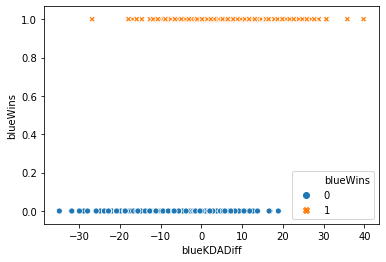

In [35]:
sns.scatterplot(data=inBlueKDA,x='blueKDADiff',y='blueWins',hue='blueWins',style='blueWins')

# Total Gold Difference

Then I plotted the all the total gold for both teams, and obviously in the figure, when the blue team get more than 21000 gold in first 10 mins, they will have 100% probability to win the game. 

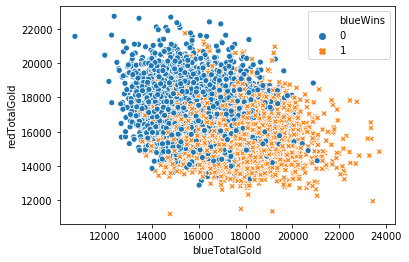

In [36]:
sns.scatterplot(data=data,x='blueTotalGold',y='redTotalGold',hue='blueWins',style='blueWins')

The following plot is the relationship between gold difference in first 10 mins and the game result, and we can see that when blue team gets approx. 7000 gold more than red team, then blue team will win the game. 

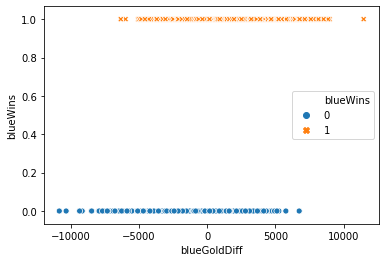

In [37]:
sns.scatterplot(data=data,x='blueGoldDiff',y='blueWins',hue='blueWins',style='blueWins')

# Experience Difference

Then the plot of all experience of both team, and the second figure is the relationship between experience difference in first 10 mins and the result of the games. It is hard to conclud anything from the first figure, but from the second figure, we can see that when blue team has approx. 6000 experience more than red team, then blue team wins the game. 

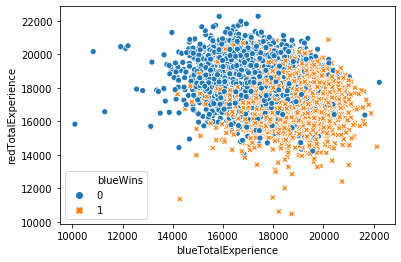

In [38]:
sns.scatterplot(data=data,x='blueTotalExperience',y='redTotalExperience',hue='blueWins',style='blueWins')

In [39]:
sns.scatterplot(data=data,x='blueExperienceDiff',y='blueWins',hue='blueWins',style='blueWins')

# Prediction of game result

In [40]:
data['blueKDA'] = KDA['blueKDA'].round(1)
data['redKDA'] = KDA['redKDA'].round(1)
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()
data

blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0            0               28                   2               1   
1            0               12                   1               0   
2            0               15                   0               0   
3            0               43                   1               0   
4            0               75                   4               0   
...        ...              ...                 ...             ...   
9874         1               17                   2               1   
9875         1               54                   0               0   
9876         0               23                   1               0   
9877         0               14                   4               1   
9878         1               18                   0               1   

      blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  \
0             9           6           11                  0            0   
1             5           5            5                  0            0   
2             7          11            4                  1            1   
3             4           5            5                  1            0   
4             6           6            6                  0            0   
...         ...         ...          ...                ...          ...   
9874          7           4            5                  1            1   
9875          6           4            8                  1            1   
9876          6           7            5                  0            0   
9877          2           3            3                  1            1   
9878          6           6            5                  0            0   

      blueHeralds  ...  redAvgLevel  redTotalExperience  \
0               0  ...          6.8               17047   
1               0  ...          6.8               17438   
2               0  ...          6.8               17254   
3               1  ...          7.0               17961   
4               0  ...          7.0               18313   
...           ...  ...          ...                 ...   
9874            0  ...          6.8               16498   
9875            0  ...          7.0               18367   
9876            0  ...          7.4               19909   
9877            0  ...          7.2               18314   
9878            0  ...          6.8               17379   

      redTotalMinionsKilled  redTotalJungleMinionsKilled  redGoldDiff  \
0                       197                           55         -643   
1                       240                           52         2908   
2                       203                           28         1172   
3                       235                           47         1321   
4                       225                           67         1004   
...                     ...                          ...          ...   
9874                    229                           34        -2519   
9875                    206                           56         -782   
9876                    261                           60         2416   
9877                    247                           40          839   
9878                    201                           46         -927   

      redExperienceDiff  redCSPerMin  redGoldPerMin  blueKDA  redKDA  
0                     8         19.7         1656.7      3.3     1.6  
1                  1173         24.0         1762.0      2.0     1.4  
2                  1033         20.3         1728.5      1.0     3.6  
3                     7         23.5         1647.8      1.8     3.8  
4                  -230         22.5         1740.4      2.0     2.2  
...                 ...          ...            ...      ...     ...  
9874              -2469         22.9         1524.6      3.0     1.6  
9875               -888         20.6         1545.6      3.5     1.2  
9876           

Then I build some models to predict the game result with first 10 mins performance. All the models are have around 70% accuracy.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

sample = data.drop('blueWins',axis=1)
label = data['blueWins']
sample_train, sample_test, label_train, label_test = train_test_split(sample, label, test_size=0.1)

In [42]:
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C=0.01)
LRmodel.fit(sample_train,label_train)
pred_LR = LRmodel.predict(sample_test)
acc_LR = accuracy_score(pred_LR, label_test)

print('Logistic Regression Prediction Accuracy: ' + str(acc_LR))


Logistic Regression Prediction Accuracy: 0.7364102564102564


In [43]:
from sklearn.tree import DecisionTreeClassifier
DTmodel = DecisionTreeClassifier(criterion='entropy',max_depth=5)
DTmodel.fit(sample_train,label_train)
pred_DT = DTmodel.predict(sample_test)
acc_DT = accuracy_score(pred_DT,label_test)

print('Decision Tree Classifier Prediction Accuracy: ' + str(acc_DT))

Decision Tree Classifier Prediction Accuracy: 0.7343589743589743


In [44]:
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(max_depth=6)
RFmodel.fit(sample_train,label_train)
pred_RF = RFmodel.predict(sample_test)
acc_RF = accuracy_score(pred_RF,label_test)

print('Random Forest Classifier Prediction Accuracy: ' + str(acc_RF))

Random Forest Classifier Prediction Accuracy: 0.7364102564102564


In [45]:
from sklearn.neighbors import KNeighborsClassifier
KNNmodel = KNeighborsClassifier(n_neighbors=45)
KNNmodel.fit(sample_train,label_train)
pred_KNN = KNNmodel.predict(sample_test)
acc_KNN = accuracy_score(pred_KNN,label_test)

print('KNN Classifier Prediction Accuracy: ' + str(acc_KNN))

KNN Classifier Prediction Accuracy: 0.72


In [46]:
from sklearn.ensemble import AdaBoostClassifier
ABmodel = AdaBoostClassifier(n_estimators=40)
ABmodel.fit(sample_train,label_train)
pred_AB = ABmodel.predict(sample_test)
acc_AB = accuracy_score(pred_AB,label_test)

print('Ada Boost Classifier Prediction Accuracy: ' + str(acc_AB))

Ada Boost Classifier Prediction Accuracy: 0.7323076923076923


In [47]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# How Champions Selection Influence the Game?

## Load the Library and Data

### Take a look for all data


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

champs = pd.read_csv('Data/champs.csv')
matches = pd.read_csv('Data/matches.csv')
participants1 = pd.read_csv('Data/participants.csv')
stats1 = pd.read_csv('Data/stats1.csv')
stats2 = pd.read_csv('Data/stats2.csv')
teambans = pd.read_csv('Data/teambans.csv')
teamstats = pd.read_csv('Data/teamstats.csv')

champs.head()

name   id
0       Jax   24
1      Sona   37
2  Tristana   18
3     Varus  110
4     Fiora  114

In [49]:
teambans.head()

matchid  teamid  championid  banturn
0       10     100          11        1
1       10     100         117        3
2       10     100         120        5
3       10     200          84        2
4       10     200         201        4

In [50]:
teamstats.head()

matchid  teamid  firstblood  firsttower  firstinhib  firstbaron  \
0       10     100           0           1           0           0   
1       10     200           1           0           1           1   
2       11     100           1           0           0           0   
3       11     200           0           1           1           0   
4       12     100           1           0           0           0   

   firstdragon  firstharry  towerkills  inhibkills  baronkills  dragonkills  \
0            0           0           5           0           0            0   
1            1           1          10           3           1            3   
2            0           0           2           0           0            0   
3            1           0          10           3           0            2   
4            0           0           1           0           0            0   

   harrykills  
0           0  
1           1  
2           0  
3           0  
4           0

In [51]:
matches.head()

id      gameid platformid  queueid  seasonid  duration       creation  \
0  10  3187427022       EUW1      420         8      1909  1495068946860   
1  11  3187425281       EUW1      420         8      1693  1495066760778   
2  12  3187269801       EUW1      420         8      1482  1495053375889   
3  13  3187252065       EUW1      420         8      1954  1495050993613   
4  14  3187201038       EUW1      420         8      2067  1495047893400   

         version  
0  7.10.187.9675  
1  7.10.187.9675  
2  7.10.187.9675  
3  7.10.187.9675  
4  7.10.187.9675

### Combine Champion Name and Bans with Champion Id

In [52]:
teambans = pd.merge(teambans,champs,how='left',left_on = 'championid', right_on = 'id')
teambans.head()

matchid  teamid  championid  banturn       name   id
0       10     100          11        1  Master Yi   11
1       10     100         117        3       Lulu  117
2       10     100         120        5    Hecarim  120
3       10     200          84        2      Akali   84
4       10     200         201        4      Braum  201

### Tranlate the Roles and Position

In [53]:
def PositionTranfer(row):
    if row['role'] in ('DUO_SUPPORT', 'DUO_CARRY'):
        return row['role']
    else:
        return row['position']
    
participants1['adjP'] = participants1.apply(PositionTranfer, axis = 1)

### Checking Datasets Size Before Merging Data

In [54]:
participants1['team'] = participants1['player'].apply(lambda x: '1' if x <= 5 else '2')
participants1['team_role'] = participants1['team'] + '-' + participants1['adjP']
participants1.shape

(1834520, 11)

In [55]:
game_info=stats1.append(stats2)
game_info.shape

(1834517, 56)

### Finish Merging

In [56]:
df = pd.merge(participants1, game_info, how = 'left', on = ['id'])
df = pd.merge(df, champs, how = 'left', left_on = 'championid', right_on = 'id')
df = pd.merge(df, matches, how = 'left', left_on = 'matchid', right_on = 'id') 
df['teamid']= df['player'].apply(lambda x: '1' if x <= 5 else '2')
df.shape

(1834520, 77)

## Let's Take a Look at Champions Selection

In [57]:
sort_val=df.name.value_counts().sort_values(ascending=False)
total_records=len(matches)

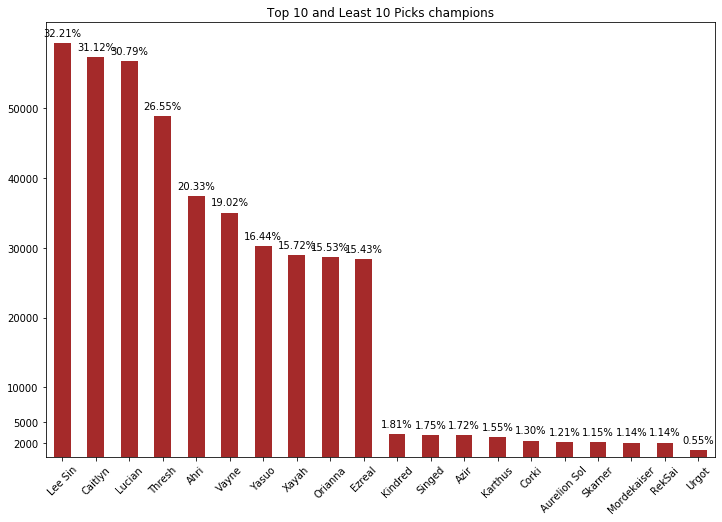

In [58]:
fig,ax = plt.subplots(figsize=(12,8))
plt.title('Top 10 and Least 10 Picks champions')
ax =pd.concat((sort_val.head(10),sort_val.tail(10))).plot(kind='bar', color = 'brown')
for p in ax.patches:
    level = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,level + 1000,'{:.2f}%'.format(level/total_records*100),ha="center",rotation=0)

plt.yticks([2000,5000,10000,20000,30000,40000,50000])
plt.xticks(rotation = 45) 
plt.show()

This is the top ten and the least ten picks champions. There are four shooters, two magicians, and only one support (Thresh) in top ten champions. Comparing to other position in the game, support is not the first choice for most people. This role has less health and low damage. Thresh must very good among all other supports. Urgot only has 0.5% picks means this champion is very bad. If you want to win, you won’t choose this champion. The Riot company redesign this champion in 2017 to save this champion’s career.

In [59]:
sort_val=teambans.name.value_counts().sort_values(ascending=False)
fig,ax = plt.subplots(figsize=(12,8))
plt.title('Top 10 and Least 10 Bans Champions')
ax=pd.concat((sort_val.head(10),sort_val.tail(10))).plot(kind='bar',color = 'gray')
for p in ax.patches:
    level = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,level + 1000,'{:.2f}%'.format(level/total_records*100),ha="center",rotation=0) 

plt.yticks([5000,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000])
plt.xticks(rotation = 45)
plt.show()

This is the top ten and the least ten bans champions. In each ranked game, each team could choose to ban 5 champions for the other team, so the opponent cannot choose restrained champions, and vice versa. In top ten ban rate side, Yasuo is far ahead of other hearos, with a ban rate of 53%, which mean that every two games will have to ban Yasuo. For those champions with the lowest ban rate, I won’t be surprised because they are not strong at all and there’s not need to waste ban for them.

In [60]:
val1=teambans.name.value_counts().sort_values(ascending=False)
val2=df.name.value_counts().sort_values(ascending=False)
sort_val = (val1 + val2).sort_values(ascending=False)

In [61]:
fig,ax = plt.subplots(figsize=(12,8))
plt.title('Top 10 and Least 10 Popular Champions')
ax=pd.concat((sort_val.head(10),sort_val.tail(10))).plot(kind='bar',color = 'orange')
for p in ax.patches:
    level = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,level + 1000,'{:.2f}%'.format(level/total_records*100),ha="center",rotation=0) 
    
plt.yticks([10000,20000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000])
plt.xticks(rotation = 45)
plt.show()

This is most popular champions. I use formula bans rate + picks rate = popular rate. With not surprise, Yasuo is the most popular one. As lone as opponent did not ban it, player will choose him. These top ten popular champions are not only strong, but also have special mechanism to provide good feedback to players. When we stand on game designer’ perspective, designers can also learn their customer and balanced the game. For example, they can remake the champions to bring more favor for the weak one. As a long-term game. They do not want people always choose same type of champion all the time.

## Let's take a look at total KDA and Win rate

In [62]:
CS = df.groupby('name').agg({'win': 'sum','name': 'count','kills':'mean','deaths':'mean','assists':'mean'}) 
CS.columns = ['win' , 'total matches', 'K', 'D', 'A']

#mean KDA
CS['KDA'] = (CS.K + CS.A)/CS.D
CS['Standard KDA (KDA-mean)'] = CS['KDA'] - CS.KDA.mean()

#50% win ratio
CS['win rate']  = CS.win/CS['total matches'] * 100  
CS['standard win rate (win rate - 50%)']  = CS['win rate'] - 50.0 

CS = CS.round(2)
CS.reset_index(inplace=True)
CS.sort_values(by='win rate', ascending = False).head(10)

name      win  total matches     K     D      A   KDA  \
40      Ivern   4578.0           8194  2.61  4.09  12.98  3.81   
5      Anivia   4194.0           7785  6.23  4.66   7.39  2.92   
127    Xerath   3357.0           6273  7.09  5.34   8.36  2.89   
99       Sona   7529.0          14090  2.93  5.57  13.52  2.95   
1        Ahri  19949.0          37424  7.08  5.43   7.51  2.69   
41      Janna  12856.0          24296  0.86  3.94  14.15  3.81   
98    Skarner   1116.0           2111  4.71  4.95   8.95  2.76   
80   Pantheon   5934.0          11305  7.87  6.31   6.63  2.30   
4       Amumu   7118.0          13585  4.59  5.30  10.65  2.88   
22     Draven  10633.0          20327  7.62  6.41   6.30  2.17   

     Standard KDA (KDA-mean)  win rate  standard win rate (win rate - 50%)  
40                      1.40     55.87                                5.87  
5                       0.51     53.87                                3.87  
127                     0.48     53.52                                3.52  
99                      0.54     53.44                                3.44  
1                       0.28     53.31                                3.31  
41                      1.40     52.91                                2.91  
98                      0.35     52.87                                2.87  
80                     -0.11     52.49                                2.49  
4                       0.46     52.40                                2.40  
22                     -0.24     52.31                                2.31

In [63]:
win_rate = CS.sort_values(by='win rate',ascending=False)
KDA_data = CS.sort_values(by='KDA',ascending=False)

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12, 20))
sns.barplot(x='standard win rate (win rate - 50%)', y='name', data=win_rate, ax=ax1)
sns.barplot(x='Standard KDA (KDA-mean)', y='name', data=KDA_data, ax=ax2)

There are half of the champions that has positive win rate and those top win rate champions cannot surpass 60%-win rate. 
Kda(kill death, and assist rate) is a very interesting feature. It high kda means the champion (kills + assists) a lot, but rarely death. However, high KDA doesn't 100% means high damage in real game. Mean kda is about 2.4. but the highest kdi has 3.9. the top three, there two supports and one’s role is in the jungle. Because these heroes are easier to get assists in the early stages of the game and their self-protection ability is often relatively strong, and the weight of kill and assists in the KDA calculation is the same, so heroes with weak survivability such as shooters and wizards are often not easy Get a high KDA. But neither the win rate nor the KDA can explain the strength of a hero, because this is still related to the characteristic of each hero.

## Champ Selection in Different Lane

I made a hero’s laning restraint table based on the hero’s laning win rate, but only analyzed the mid lane and top lane, because the bottom road is a two-player road, you can't just watch one hero, and the jungler also cooperates with the top lane more, so we do not need to made these graphs.Before I do That, I will clean the data and remove those games duo on top lane and mid lane.

### Data Cleaning

In [64]:
DuoGame = df[df['team_role'] == '1-MID'].groupby('matchid').agg({'team_role':'count'})
DuoGame[DuoGame['team_role'] != 1].index.values

NeedRemoved = []
for i in ('1-DUO_SUPPORT', '1-TOP', '2-DUO_CARRY', '1-JUNGLE', '2-MID', '1-DUO_CARRY', '1-MID', '2-TOP', '2-DUO_SUPPORT', '2-JUNGLE'):
    DuoGame = df[df['team_role'] == i].groupby('matchid').agg({'team_role':'count'})
    NeedRemoved.extend(DuoGame[DuoGame['team_role'] != 1].index.values)

NeedRemoved.extend(df[df['adjP'] == 'BOT']['matchid'].unique())
NeedRemoved = list(set(NeedRemoved))

print(f'Before Cleaning: {df.matchid.nunique()}')
df_cleaned = df[~df['matchid'].isin(NeedRemoved)]
print(f'After Cleaning: {df_cleaned.matchid.nunique()}')

Before Cleaning: 184069
After Cleaning: 148638


We remove over 30000 ranked game data. 

### Match up
Now we are focus on how top and mid lane champions compete. We will match up the champions with their games id.**

In [65]:
df_shift = df_cleaned.sort_values(['matchid', 'adjP'], ascending = [1, 1])
df_shift['shift 1'] = df_shift['name'].shift()
df_shift['shift -1'] = df_shift['name'].shift(-1)

### shift the position to measure the chapions in regions behaviors

In [66]:
def get_matchup(x):
    if x['player'] > 5:
        if x['name'] >= x['shift 1']:
            matchup = x['shift 1'] + ' vs ' + x['name']
        else:
            matchup = x['name'] + ' vs ' + x['shift 1']
    else:
        if x['name'] >= x['shift -1']:
            matchup = x['shift -1'] + ' vs ' + x['name']
        else:
            matchup = x['name'] + ' vs ' + x['shift -1']
    return matchup

In [67]:
match_up = df_shift.apply(get_matchup, axis=1)
df_shift.insert(7, 'pattern', match_up)
df_shift = df_shift.drop(['platformid','queueid','role','position','shift 1','shift -1'], axis=1)
df_shift.head(10)

id_x  matchid  player  championid  ss1  ss2             pattern  \
2    11       10       3         119    7    4      Draven vs Jinx   
8    17       10       9         222    7    4      Draven vs Jinx   
1    10       10       2         267    3    4      Nami vs VelKoz   
9    18       10      10         161   14    4      Nami vs VelKoz   
0     9       10       1          19    4   11  Skarner vs Warwick   
5    14       10       6          72   11    4  Skarner vs Warwick   
4    13       10       5         112    4    3      Ahri vs Viktor   
7    16       10       8         103   14    4      Ahri vs Viktor   
3    12       10       4         114   12    4      Fiora vs Galio   
6    15       10       7           3    4   12      Fiora vs Galio   

          adjP team      team_role  ...  firstblood     name  id_y  id  \
2    DUO_CARRY    1    1-DUO_CARRY  ...         0.0   Draven   119  10   
8    DUO_CARRY    2    2-DUO_CARRY  ...         1.0     Jinx   222  10   
1  DUO_SUPPORT    1  1-DUO_SUPPORT  ...         0.0     Nami   267  10   
9  DUO_SUPPORT    2  2-DUO_SUPPORT  ...         0.0   VelKoz   161  10   
0       JUNGLE    1       1-JUNGLE  ...         0.0  Warwick    19  10   
5       JUNGLE    2       2-JUNGLE  ...         0.0  Skarner    72  10   
4          MID    1          1-MID  ...         0.0   Viktor   112  10   
7          MID    2          2-MID  ...         0.0     Ahri   103  10   
3          TOP    1          1-TOP  ...         0.0    Fiora   114  10   
6          TOP    2          2-TOP  ...         0.0    Galio     3  10   

       gameid  seasonid  duration       creation        version  teamid  
2  3187427022         8      1909  1495068946860  7.10.187.9675       1  
8  3187427022         8      1909  1495068946860  7.10.187.9675       2  
1  3187427022         8      1909  1495068946860  7.10.187.9675       1  
9  3187427022         8      1909  1495068946860  7.10.187.9675       2  
0  3187427022         8      1909  1495068946860  7.10.187.9675       1  
5  3187427022         8      1909  1495068946860  7.10.187.9675       2  
4  3187427022         8      1909  1495068946860  7.10.187.9675       1  
7  3187427022         8      1909  1495068946860  7.10.187.9675       2  
3  3187427022         8      1909  1495068946860  7.10.187.9675       1  
6  3187427022         8      1909  1495068946860  7.10.187.9675       2  

[10 rows x 74 columns]

In [68]:
winner= df_shift.apply(lambda x: x['win'] if x['name'] == x['pattern'].split(' vs ')[0] else 0, axis = 1)
df_shift.insert(8, 'winner', winner)
df_shift.head(10)

id_x  matchid  player  championid  ss1  ss2             pattern  \
2    11       10       3         119    7    4      Draven vs Jinx   
8    17       10       9         222    7    4      Draven vs Jinx   
1    10       10       2         267    3    4      Nami vs VelKoz   
9    18       10      10         161   14    4      Nami vs VelKoz   
0     9       10       1          19    4   11  Skarner vs Warwick   
5    14       10       6          72   11    4  Skarner vs Warwick   
4    13       10       5         112    4    3      Ahri vs Viktor   
7    16       10       8         103   14    4      Ahri vs Viktor   
3    12       10       4         114   12    4      Fiora vs Galio   
6    15       10       7           3    4   12      Fiora vs Galio   

          adjP  winner team  ... firstblood     name  id_y  id      gameid  \
2    DUO_CARRY     0.0    1  ...        0.0   Draven   119  10  3187427022   
8    DUO_CARRY     0.0    2  ...        1.0     Jinx   222  10  3187427022   
1  DUO_SUPPORT     0.0    1  ...        0.0     Nami   267  10  3187427022   
9  DUO_SUPPORT     0.0    2  ...        0.0   VelKoz   161  10  3187427022   
0       JUNGLE     0.0    1  ...        0.0  Warwick    19  10  3187427022   
5       JUNGLE     1.0    2  ...        0.0  Skarner    72  10  3187427022   
4          MID     0.0    1  ...        0.0   Viktor   112  10  3187427022   
7          MID     1.0    2  ...        0.0     Ahri   103  10  3187427022   
3          TOP     0.0    1  ...        0.0    Fiora   114  10  3187427022   
6          TOP     0.0    2  ...        0.0    Galio     3  10  3187427022   

   seasonid  duration       creation        version  teamid  
2         8      1909  1495068946860  7.10.187.9675       1  
8         8      1909  1495068946860  7.10.187.9675       2  
1         8      1909  1495068946860  7.10.187.9675       1  
9         8      1909  1495068946860  7.10.187.9675       2  
0         8      1909  1495068946860  7.10.187.9675       1  
5         8      1909  1495068946860  7.10.187.9675       2  
4         8      1909  1495068946860  7.10.187.9675       1  
7         8      1909  1495068946860  7.10.187.9675       2  
3         8      1909  1495068946860  7.10.187.9675       1  
6         8      1909  1495068946860  7.10.187.9675       2  

[10 rows x 75 columns]

### Top Lane

In [69]:
df_top = df_shift[df_shift['adjP']=='TOP']
 
counter_top = df_top.groupby('pattern').agg({'win': 'count', 'winner': 'sum'})
counter_top.reset_index(inplace=True)
counter_top.columns = ['pattern', 'total matchs', 'total first win']
counter_top['total matchs'] = counter_top['total matchs'] / 2
counter_top['counter rate'] = counter_top['total first win'] / counter_top['total matchs']
counter_top['counter rate compared 50%'] = counter_top['total first win'] / counter_top['total matchs'] - 0.5
 
counter_top['abs'] = abs(counter_top['counter rate compared 50%']) 
counter_top = counter_top[(counter_top['total matchs']>100) & (counter_top['total first win']>0)].sort_values(by='abs', ascending=False)
counter_top.reset_index(inplace=True)
 
counter_top.head()

index              pattern  total matchs  total first win  counter rate  \
0   1920  Gangplank vs Singed         102.0             67.0      0.656863   
1   4993      Yasuo vs Yorick         109.0             71.0      0.651376   
2   4573        Shen vs Teemo         189.0             67.0      0.354497   
3   3751      Maokai vs Yasuo         113.0             41.0      0.362832   
4   2502     Irelia vs Kennen         186.0            118.0      0.634409   

   counter rate compared 50%       abs  
0                   0.156863  0.156863  
1                   0.151376  0.151376  
2                  -0.145503  0.145503  
3                  -0.137168  0.137168  
4                   0.134409  0.134409

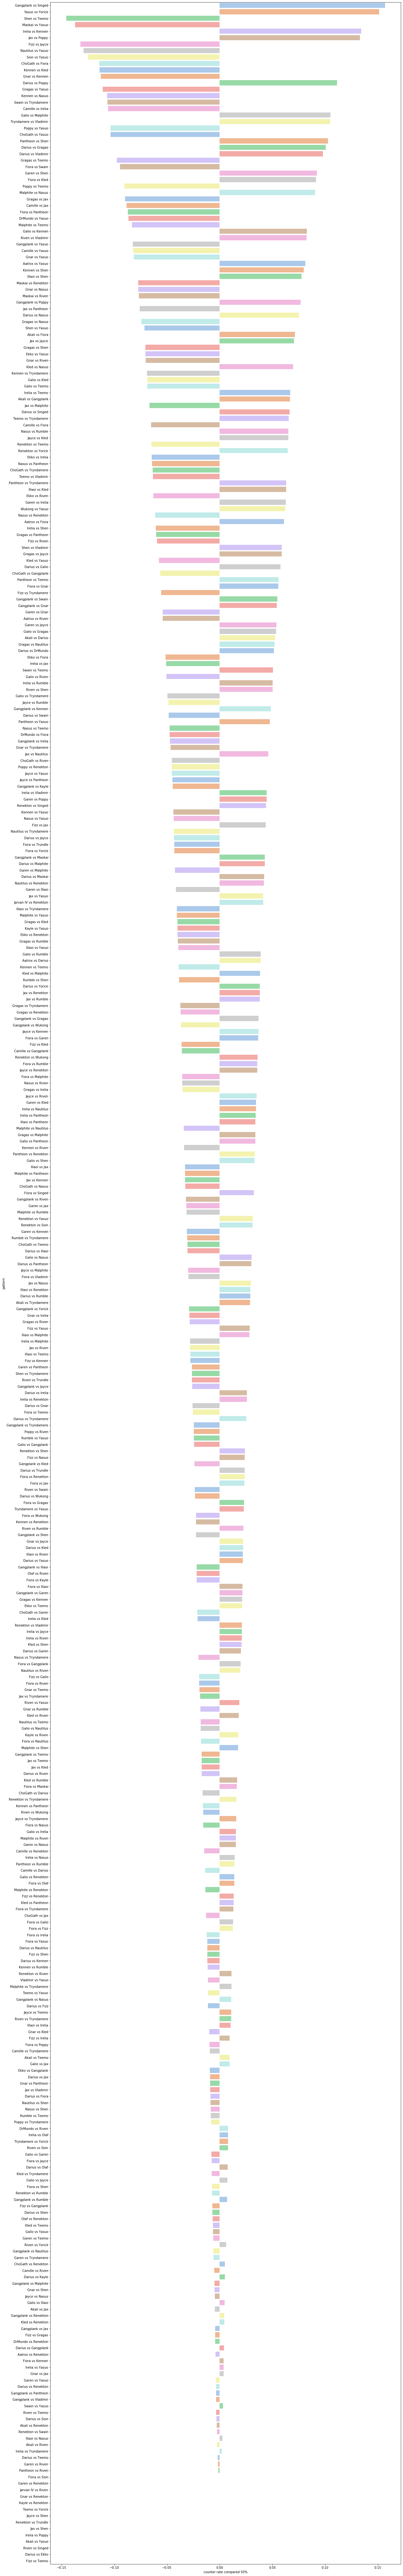

In [70]:
plt.figure(figsize=(20, 150))
sns.barplot(x="counter rate compared 50%", y="pattern", data=counter_top, palette='pastel')

The graph is huge. There are more than 300 distinct patterns that generate on this graph and all these patters appeared more than 100 times in the whole dataset, so I think these patterns are classic. If you played Ganplank in the Top lane and the opponent plays Singed, there are very high change that you may lost in the end. If you played as Shen and your opponent choose Teemo, you have very high change to win. We can definitely check these graph before the game to increase your win rate a little bit.

### Mid Lane

In [71]:
df_mid = df_shift[df_shift['adjP']=='MID']
 
counter_mid = df_mid.groupby('pattern').agg({'win': 'count', 'winner': 'sum'})
counter_mid.reset_index(inplace=True)
counter_mid.columns = ['pattern', 'total matchs', 'total first win']
counter_mid['total matchs'] = counter_mid['total matchs'] / 2
counter_mid['counter rate'] = counter_mid['total first win'] / counter_mid['total matchs']
counter_mid['counter rate compared 50%'] = counter_mid['total first win'] / counter_mid['total matchs'] - 0.5
 
counter_mid['abs'] = abs(counter_mid['counter rate compared 50%']) 
counter_mid = counter_mid[(counter_mid['total matchs']>100) & (counter_mid['total first win']>0)].sort_values(by='abs', ascending=False)
counter_mid.reset_index(inplace=True)
 
counter_mid.head()

index           pattern  total matchs  total first win  counter rate  \
0     96      Ahri vs Ryze         319.0            227.0      0.711599   
1    568       Azir vs Lux         150.0             53.0      0.353333   
2   1192      Ekko vs Ryze         130.0             83.0      0.638462   
3   1443      Fizz vs Ryze         158.0            100.0      0.632911   
4   2092  Kassadin vs Ryze         147.0             93.0      0.632653   

   counter rate compared 50%       abs  
0                   0.211599  0.211599  
1                  -0.146667  0.146667  
2                   0.138462  0.138462  
3                   0.132911  0.132911  
4                   0.132653  0.132653

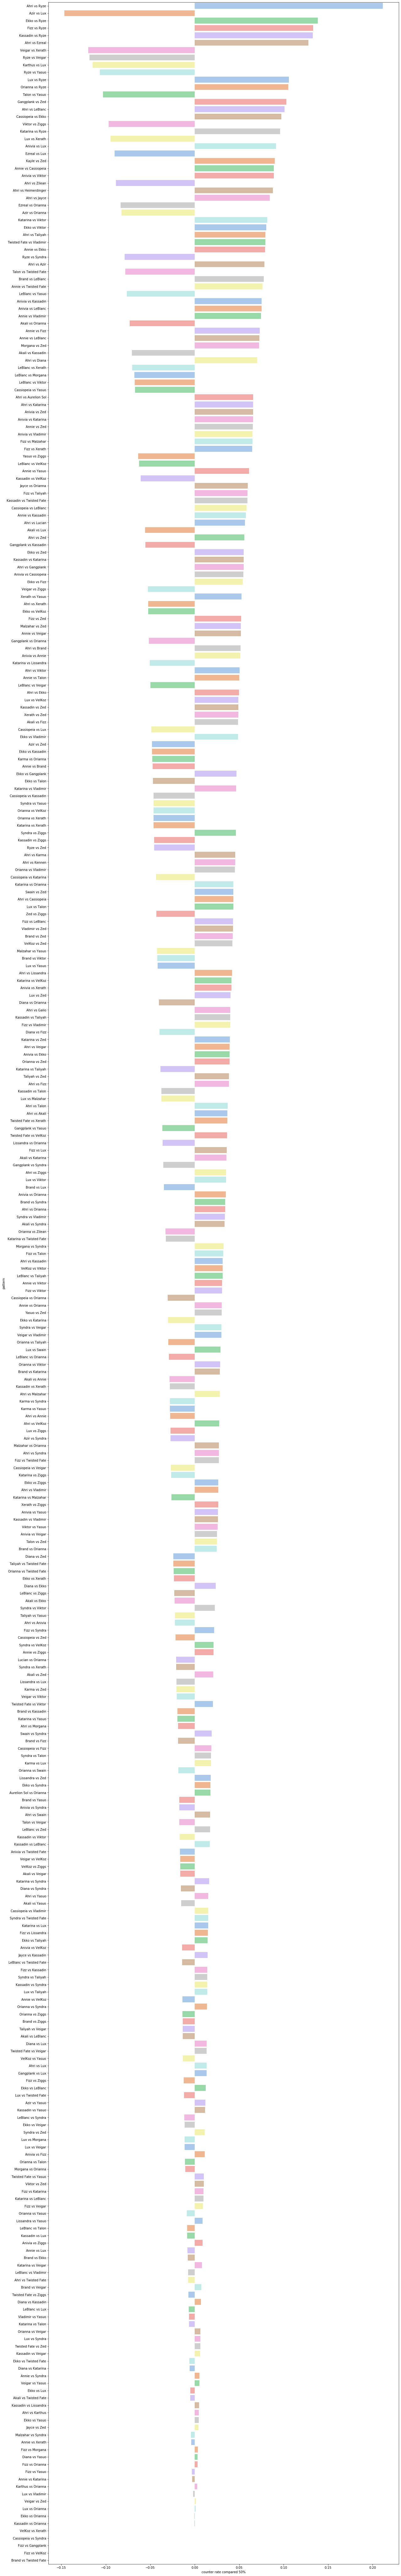

In [72]:
plt.figure(figsize=(20, 150))
sns.barplot(x="counter rate compared 50%", y="pattern", data=counter_mid, palette='pastel')

## Wardsplaced and Kills
We select most of recent Games, Season 8

In [73]:
season8 = df_cleaned[['id', 'matchid', 'player', 'name', 'adjP', 'team_role', 'win', 'kills', 'deaths', 'assists', 'turretkills','totminionskilled','totdmgtaken', 'inhibkills','wardsplaced', 'duration', 'platformid', 'seasonid']]
season8 = season8[season8['seasonid'] == 8]
print('Season 8: ',season8.matchid.nunique())
season8.head(10)

Season 8:  140403


id  matchid  player     name         adjP      team_role  win  kills  \
0  10       10       1  Warwick       JUNGLE       1-JUNGLE  0.0    6.0   
1  10       10       2     Nami  DUO_SUPPORT  1-DUO_SUPPORT  0.0    0.0   
2  10       10       3   Draven    DUO_CARRY    1-DUO_CARRY  0.0    7.0   
3  10       10       4    Fiora          TOP          1-TOP  0.0    5.0   
4  10       10       5   Viktor          MID          1-MID  0.0    2.0   
5  10       10       6  Skarner       JUNGLE       2-JUNGLE  1.0    3.0   
6  10       10       7    Galio          TOP          2-TOP  1.0    4.0   
7  10       10       8     Ahri          MID          2-MID  1.0   13.0   
8  10       10       9     Jinx    DUO_CARRY    2-DUO_CARRY  1.0   15.0   
9  10       10      10   VelKoz  DUO_SUPPORT  2-DUO_SUPPORT  1.0    4.0   

   deaths  assists  turretkills  totminionskilled  totdmgtaken  inhibkills  \
0    10.0      1.0          0.0              42.0      41446.0         0.0   
1     2.0     12.0          1.0              17.0      17769.0         0.0   
2     8.0      5.0          0.0             205.0      25627.0         0.0   
3    11.0      2.0          3.0             164.0      31705.0         0.0   
4     8.0      2.0          1.0             235.0      20585.0         0.0   
5     3.0      9.0          1.0              28.0      22708.0         0.0   
6     5.0     11.0          2.0             187.0      21719.0         0.0   
7     4.0      8.0          3.0             183.0      19174.0         0.0   
8     3.0      9.0          2.0             191.0      17655.0         2.0   
9     5.0     19.0          0.0              72.0      13443.0         0.0   

   wardsplaced  duration platformid  seasonid  
0         10.0      1909       EUW1         8  
1         17.0      1909       EUW1         8  
2         13.0      1909       EUW1         8  
3          3.0      1909       EUW1         8  
4         10.0      1909       EUW1         8  
5          8.0      1909       EUW1         8  
6          7.0      1909       EUW1         8  
7          8.0      1909       EUW1         8  
8          6.0      1909       EUW1         8  
9         25.0      1909       EUW1         8

### The feature of'wardsplaced' is the number of insertions. 

In [74]:
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.4f' % x) 

wardsplaced = season8['wardsplaced'].value_counts().sort_index() / len(df)
wardsplaced.cumsum()
kills = season8['kills'].value_counts().sort_index() / len(season8)
kills.cumsum()

0.0000    0.0645
1.0000    0.1580
2.0000    0.2595
3.0000    0.3593
4.0000    0.4541
5.0000    0.5419
6.0000    0.6214
7.0000    0.6916
8.0000    0.7525
9.0000    0.8041
10.0000   0.8469
11.0000   0.8817
12.0000   0.9098
13.0000   0.9318
14.0000   0.9491
15.0000   0.9623
16.0000   0.9723
17.0000   0.9798
18.0000   0.9854
19.0000   0.9896
20.0000   0.9926
21.0000   0.9948
22.0000   0.9964
23.0000   0.9975
24.0000   0.9982
25.0000   0.9988
26.0000   0.9992
27.0000   0.9994
28.0000   0.9996
29.0000   0.9997
30.0000   0.9998
31.0000   0.9999
32.0000   0.9999
33.0000   0.9999
34.0000   1.0000
35.0000   1.0000
36.0000   1.0000
37.0000   1.0000
38.0000   1.0000
39.0000   1.0000
41.0000   1.0000
42.0000   1.0000
43.0000   1.0000
44.0000   1.0000
Name: kills, dtype: float64

In [75]:
season8['wardsplaced'] = season8['wardsplaced'].apply(lambda x: x if x<=37 else 37)
season8['kills'] = season8['kills'].apply(lambda x: x if x<=20 else 20)

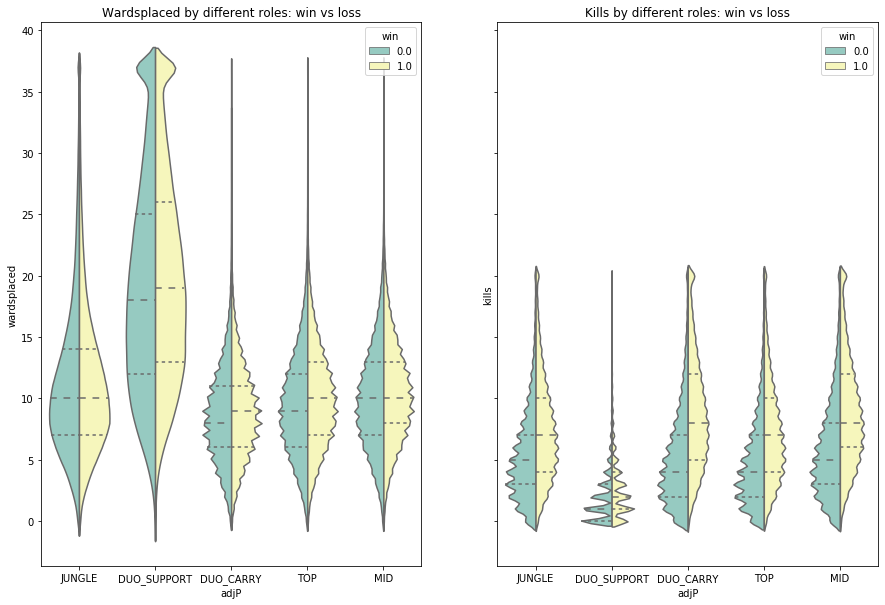

In [76]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15, 10))
sns.violinplot(x='adjP', y='wardsplaced', hue="win", data=season8, palette='Set3', split=True, inner='quartile', ax=ax1)
sns.violinplot(x="adjP", y="kills", hue="win", data=season8, palette='Set3', split=True, inner='quartile', ax=ax2)
ax1.title.set_text('Wardsplaced by different roles: win vs loss')
ax2.title.set_text('Kills by different roles: win vs loss')

* Left graph is wardplaced by different roles. Wardsplanced means open a hidden region for all teammates, so they can know if any enemy pass by or set a trap in the grass. In the left graph, we can see the Duo support most time do these stuffs for the team. Carry rarely warsplaced for team because they need to spend most of their time on kill amines and return home to buy equipment. 
* Right graph is kills made by different roles. we can see the support rarely kills enemy especially when game over 20 minutes, the carries’s equipment are shield and they cannot do much damage for enemy team. All other roles have pretty good kill number but the win team. The winner teams have more kill than loss team. 